[View in Colaboratory](https://colab.research.google.com/github/manan-arya/Fake_News_US/blob/master/Classifier.ipynb)

In [50]:
!wget https://raw.githubusercontent.com/manan-arya/Fake_News_US/master/kaggle_dataset/train.csv?token=AcjiTfZQHIFYhQ_qKtVo0y6rG3mD71Lcks5bl-ZPwA%3D%3D
!wget https://raw.githubusercontent.com/manan-arya/Fake_News_US/master/kaggle_dataset/test.csv?token=AcjiTZknxG_W1-9YmnE6V9HSgBkxaIJgks5bl-aEwA%3D%3D

--2018-09-06 03:04:53--  https://raw.githubusercontent.com/manan-arya/Fake_News_US/master/kaggle_dataset/train.csv?token=AcjiTfZQHIFYhQ_qKtVo0y6rG3mD71Lcks5bl-ZPwA%3D%3D
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98628550 (94M) [text/plain]
Saving to: ‘train.csv?token=AcjiTfZQHIFYhQ_qKtVo0y6rG3mD71Lcks5bl-ZPwA%3D%3D.1’

train.csv?token=Acj 100%[===================>]  94.06M   106MB/s    in 0.9s    

2018-09-06 03:04:55 (106 MB/s) - ‘train.csv?token=AcjiTfZQHIFYhQ_qKtVo0y6rG3mD71Lcks5bl-ZPwA%3D%3D.1’ saved [98628550/98628550]

--2018-09-06 03:04:56--  https://raw.githubusercontent.com/manan-arya/Fake_News_US/master/kaggle_dataset/test.csv?token=AcjiTZknxG_W1-9YmnE6V9HSgBkxaIJgks5bl-aEwA%3D%3D
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [52]:
train = pd.read_csv('train.csv?token=AcjiTfZQHIFYhQ_qKtVo0y6rG3mD71Lcks5bl-ZPwA%3D%3D')
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [53]:
test = pd.read_csv('test.csv?token=AcjiTZknxG_W1-9YmnE6V9HSgBkxaIJgks5bl-aEwA%3D%3D')
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


Unreliable = 1
Reliable = 0

##Plots

In [0]:
train_no_id = train.drop('id', axis = 1)

In [55]:
for_graph_fake = train_no_id.groupby(by = 'author', axis = 0, as_index = False).sum()
for_graph_fake.columns

Index(['author', 'label'], dtype='object')

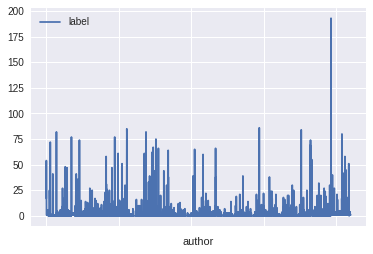

In [56]:
for_graph_fake.plot(x = 'author', y = 'label', kind = 'line')

In [57]:
len(for_graph_fake)

4201

In [58]:
for_graph_fake['label'].nlargest(n = 2, keep = 'first')

3929    193
2939     86
Name: label, dtype: int64

In [59]:
for_graph_fake.head()

,author,label
0,# 1 NWO Hatr,17
1,-NO AUTHOR-,54
2,10 Habits That Will Make Your Life Easier &amp...,1
3,10 More Beautiful Images That Remind You We St...,1
4,10 Movies That Could Change Your Understanding...,1


In [60]:
for_graph_fake.max()

author    “Shoot First Ask Questions Later” : What Happe...
label                                                   193
dtype: object

In [61]:
for_graph_total = train.groupby('author', axis = 0, as_index = False).count().loc[:,['author','label']]
for_graph_total.head()

,author,label
0,# 1 NWO Hatr,17
1,-NO AUTHOR-,54
2,10 Habits That Will Make Your Life Easier &amp...,1
3,10 More Beautiful Images That Remind You We St...,1
4,10 Movies That Could Change Your Understanding...,1


In [0]:
for_graph_mean = train_no_id.groupby(by = 'author', axis = 0, as_index = False)['label'].sum()/train.groupby('author', axis = 0, as_index = False).count().loc[:,['label']]

In [66]:
for_graph_mean

,author,label
0,NaN,1.0
1,NaN,1.0
2,NaN,1.0
3,NaN,1.0
4,NaN,1.0
5,NaN,1.0
6,NaN,1.0
7,NaN,1.0
8,NaN,1.0
9,NaN,1.0
